In [23]:
%matplotlib inline
import os, sys, gc
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML
load_dir = 'lo-shot-dinos-classification-genetic-pilot'
print(os.listdir(load_dir))
from numpy import array
sl =[[array([0., 0., 1.]), array([0.25, 0.25, 0.5 ])],
 [array([0., 0., 1.]), array([0.25, 0.5 , 0.25])],
 [array([0., 0., 1.]), array([0.25, 0.75, 0.  ])],
 [array([0., 0., 1.]), array([0.5, 0.5, 0. ])],
 [array([0.  , 0.25, 0.75]), array([0.25, 0.  , 0.75])],
 [array([0.  , 0.25, 0.75]), array([0.25, 0.25, 0.5 ])],
 [array([0.  , 0.25, 0.75]), array([0.25, 0.5 , 0.25])],
 [array([0.  , 0.25, 0.75]), array([0.25, 0.75, 0.  ])],
 [array([0.  , 0.25, 0.75]), array([0.5, 0. , 0.5])],
 [array([0.  , 0.25, 0.75]), array([0.5 , 0.25, 0.25])],
 [array([0.  , 0.25, 0.75]), array([0.5, 0.5, 0. ])],
 [array([0.  , 0.25, 0.75]), array([0.75, 0.25, 0.  ])],
 [array([0. , 0.5, 0.5]), array([0.25, 0.25, 0.5 ])],
 [array([0. , 0.5, 0.5]), array([0.5, 0. , 0.5])],
 [array([0. , 0.5, 0.5]), array([0.5 , 0.25, 0.25])],
 [array([0.25, 0.25, 0.5 ]), array([0.25, 0.25, 0.5 ])],
 [array([0.25, 0.25, 0.5 ]), array([0.25, 0.5 , 0.25])]]

['b', 'html-button-response.csv', 'participants.csv', 'survey-multi-choice.csv']


In [24]:
num=11
ignore = [] #workers to exclude
button_response_data = pd.read_csv("{}/html-button-response.csv".format(load_dir))
responses = button_response_data[(button_response_data.task == 'testing_c1_categorize') | (button_response_data.task == 'testing_c2_categorize')]
responses = responses[["wid", "task", "response", "target_dino", "label_pair", "manifold_jitter"]]
responses["response"] = responses["response"].astype('category',copy=False)
responses["target_dino"] = responses["target_dino"].astype('category',copy=False)
responses= responses[responses.label_pair == num]
#responses=responses[responses.label_pair == num]
cloud1 = responses[responses.task == 'testing_c1_categorize']
cloud2 = responses[responses.task == 'testing_c2_categorize']
responses


,wid,task,response,target_dino,label_pair,manifold_jitter
1049,w5bdfd34,testing_c1_categorize,0,0.0,11,True
1050,w5bdfd34,testing_c1_categorize,2,4.0,11,True
1051,w5bdfd34,testing_c1_categorize,2,1.0,11,True
1052,w5bdfd34,testing_c1_categorize,0,17.0,11,True
1053,w5bdfd34,testing_c1_categorize,2,2.0,11,True
...,...,...,...,...,...,...
3633,wd1c4095,testing_c2_categorize,0,13.0,11,True
3634,wd1c4095,testing_c2_categorize,2,1.0,11,True
3635,wd1c4095,testing_c2_categorize,0,10.0,11,True
3636,wd1c4095,testing_c2_categorize,1,8.0,11,True


In [25]:
sl[num]

[array([0.  , 0.25, 0.75]), array([0.75, 0.25, 0.  ])]

In [36]:
def peaks(lab1, lab2):
    diffs = lab2-lab1
    shift=(1-lab2)/diffs
    shift[diffs==0]=-0.5
    return 14+(shift*(14-5))
peaks(*sl[num])

/home/ilia10000/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([17. ,  9.5,  2. ])

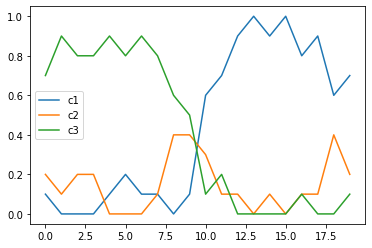

13.738636363636362 9.866666666666665 4.817073170731708


In [30]:
cloud_dict={}
for i in range(20):
    cloud_dict[i]=[0, 0, 0]
for i in range(len(responses.target_dino)):
    cloud_dict[int(list(responses.target_dino)[i])][list(responses.response)[i]]+=1
class1 = [cloud_dict[i][0]/sum(cloud_dict[i]) for i in range(20)]
class2 = [cloud_dict[i][1]/sum(cloud_dict[i]) for i in range(20)]
class3 = [cloud_dict[i][2]/sum(cloud_dict[i]) for i in range(20)]
plt.plot(list(range(20)),class1, label="c1")
plt.plot(list(range(20)),class2, label="c2")
plt.plot(list(range(20)),class3, label="c3")
plt.legend()
plt.show()
class1_ev=np.sum(class1*np.array(range(20)))/np.sum(class1)
class2_ev=np.sum(class2*np.array(range(20)))/np.sum(class2)
class3_ev=np.sum(class3*np.array(range(20)))/np.sum(class3)
print(class1_ev, class2_ev, class3_ev)

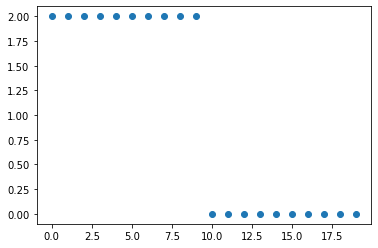

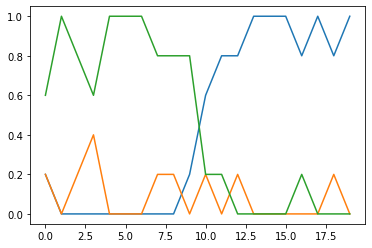

14.282608695652176
7.0
5.111111111111111


In [28]:
cloud1_dict={}
for i in range(20):
    cloud1_dict[i]=[0, 0, 0]
for i in range(len(cloud1.target_dino)):
    cloud1_dict[int(list(cloud1.target_dino)[i])][list(cloud1.response)[i]]+=1
class1 = [cloud1_dict[i][0]/sum(cloud1_dict[i]) for i in range(20)]
class2 = [cloud1_dict[i][1]/sum(cloud1_dict[i]) for i in range(20)]
class3 = [cloud1_dict[i][2]/sum(cloud1_dict[i]) for i in range(20)]
plt.plot(list(range(20)),class1)
plt.plot(list(range(20)),class2)
plt.plot(list(range(20)),class3)
plt.show()
print(np.sum(class1*np.array(range(20)))/np.sum(class1))
print(np.sum(class2*np.array(range(20)))/np.sum(class2))
print(np.sum(class3*np.array(range(20)))/np.sum(class3))

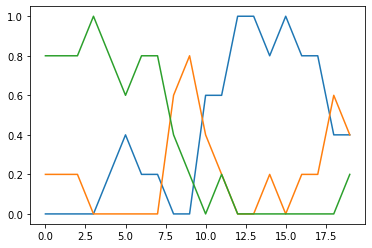

13.14285714285714
11.095238095238093
4.45945945945946


In [29]:
cloud2_dict={}
for i in range(20):
    cloud2_dict[i]=[0, 0, 0]
for i in range(len(cloud2.target_dino)):
    cloud2_dict[int(list(cloud2.target_dino)[i])][list(cloud2.response)[i]]+=1
class1 = [cloud2_dict[i][0]/sum(cloud2_dict[i]) for i in range(20)]
class2 = [cloud2_dict[i][1]/sum(cloud2_dict[i]) for i in range(20)]
class3 = [cloud2_dict[i][2]/sum(cloud2_dict[i]) for i in range(20)]
plt.plot(list(range(20)),class1)
plt.plot(list(range(20)),class2)
plt.plot(list(range(20)),class3)
plt.show()
print(np.sum(class1*np.array(range(20)))/np.sum(class1))
print(np.sum(class2*np.array(range(20)))/np.sum(class2))
print(np.sum(class3*np.array(range(20)))/np.sum(class3))